# Introduction to Machine Learning with Python

Today every smartphone can detect a face in an image. However, face detection was an unsolved problem until recently as 2001.

The most succesful kind of machine learning algorithms automate decision-making processes by generalizing from known examples.

- In this setting, which is known as supervised learning, the user provides the algorithm with pairs of inputs and desired outputs, and the algorithm finds a way to produce the desired output given an input.

**It is able to create an output for an input it has never seen before without any help from a human**

- In unsupervised learning the input data is known, and no known output data is given to the algorithm.


Important things to have in mind:
- How to phrase my question as a machine learning problem?
- Do i think the data can answer that question?
- How will I measure success of my application? 

In [1]:
%matplotlib inline
import numpy as np
import mglearn
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
import sys
import sklearn
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import KNeighborsClassifier

print('scikit-learn-version', sklearn.__version__)

scikit-learn-version 0.20.0


## Backbone

- 4 numeric arrays, 150 values => $X$
- 1 numeric array, target values => $y$

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [6]:
print(iris_dataset['DESCR'][:193])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


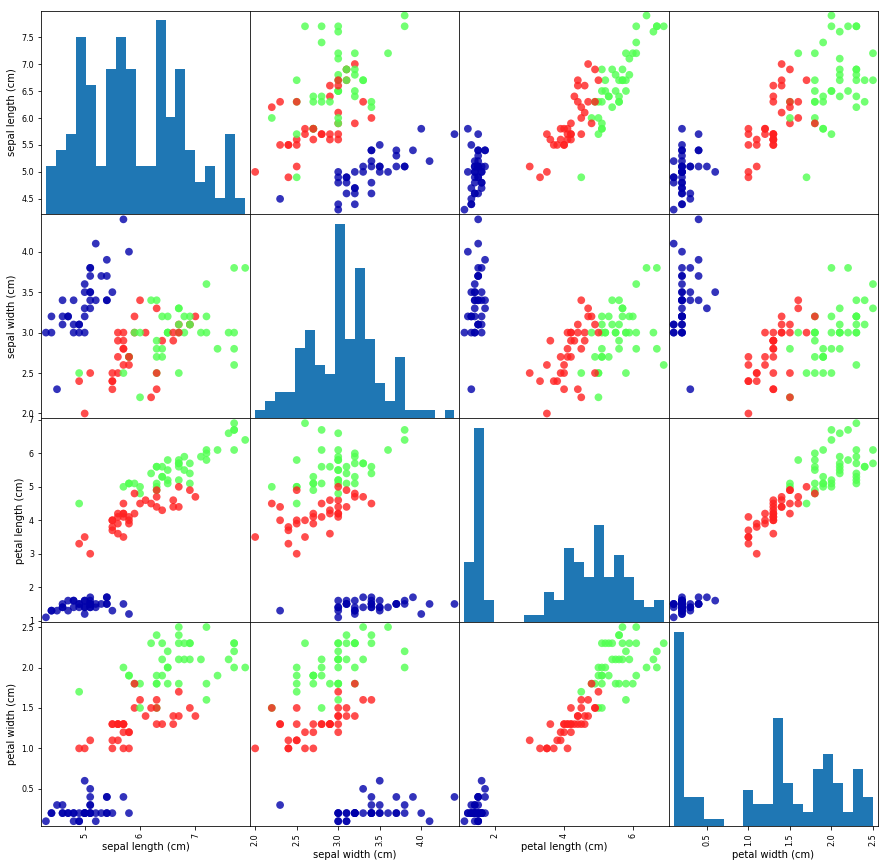

In [13]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)
plt.show()

In [29]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

X_new.shape: (1, 4)
Prediction: [0]
Predicted target name: ['setosa']


In [16]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score: 0.97
Test set score: 0.97


In [28]:
from sklearn.datasets import load_iris

# Load Data
iris_dataset = load_iris()
# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


## Supervised Learning

- Choosing a too simple model is called *underfitting*
- Building a model that is too complex for the amount of information we have, is called *overfitting*

We will always want the simplest model (not underfitting).

- An example synthetic two-class classification dataset is the *forge* data set, which has two features.

#### Forge Dataset 

- 26 data points with 2 features. 
- Along with a target array of 26 points, specifying the class of all data points.

/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


<IPython.core.display.Javascript object>


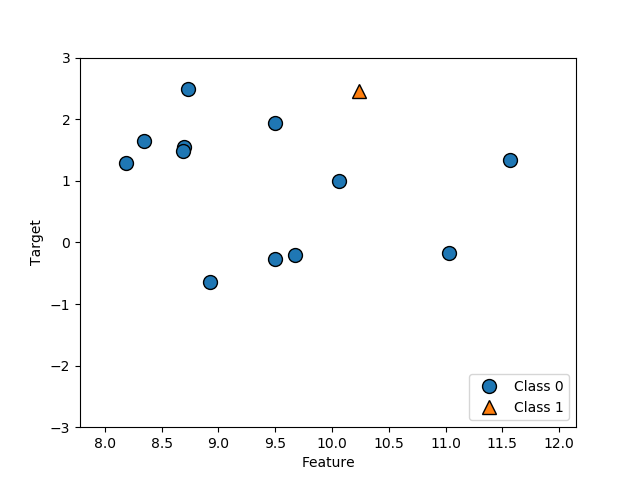

X.shape: (26, 2)


In [51]:
from sklearn.datasets.samples_generator import make_blobs
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.legend(["Class 0", "Class 1"], loc=4) 
plt.xlabel("First feature") 
plt.ylabel("Second feature")
plt.show()
print("X.shape: {}".format(X.shape))

In [46]:
print(y.shape)
print(X.shape)

(26,)
(26, 2)


#### Wave Dataset

To illustrate regression algorithms. 
- Single input feature and a continuous target variable.

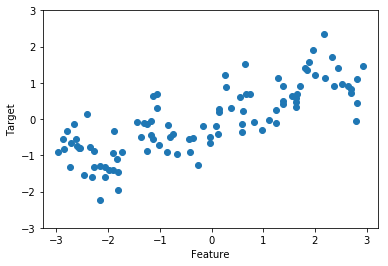

In [136]:
X, y = mglearn.datasets.make_wave(n_samples=100)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

#### Breast Cancer

- 569 rows and 30 columns.
- 212 rows (samples) are labeled malignant and 357 as benign.

Is a bunch object. They behave like dictionaries. You can access it as `bunch.key` or `bunch['key']`

In [60]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer() 
print("cancer.keys(): \n{}".format(cancer.keys()))
print("Shape of cancer data: {}".format(cancer.data.shape))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Shape of cancer data: (569, 30)


- `np.bincount()`: Count number of occurrences of each value in array of non-negative ints.

In [76]:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, 
                                                                  np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [73]:
# 30 features
print("Feature names:\n\n{}".format(cancer.feature_names))

Feature names:

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [78]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

#### Boston Housing Dataset

- Contains 506 rows and 13 features.

Here we will actually expand this dataset by not only considering these 13 measurements as input features, but also looking at all products (also called interactions) between features.

- In other words, we will consider not the features alones but the product of the features. **Including derived features like this is called feature engineering**.

In [79]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


The resulting 104 features: 13 original features with the 91 possible combinations within those 13.

In [88]:
from scipy.misc import comb
comb(13,2) + 13

91.0

In [81]:
X, y = mglearn.datasets.load_extended_boston() 
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


In [90]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

#### k-Nearest Neighbors Classification

The simplest machine learning model.
- Building the model consists only of storing the training dataset.
- The algorithm finds the closest data points in the training data set.

/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


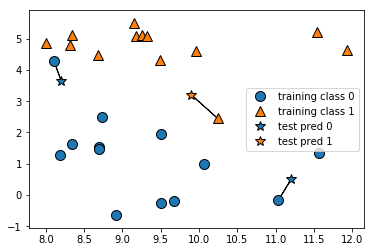

In [94]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


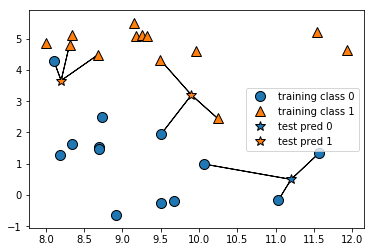

In [96]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

While this illustration is for binary classification problem. The method can be applied with any number of classes. For more classes we count how many neighbors belong to each class and predict the most common class.

In [101]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)
print('test set predictions: ', clf.predict(X_test))

print('accuracy', clf.score(X_test, y_test))

test set predictions:  [1 0 1 0 1 0 0]
accuracy 0.857142857143


/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


- Decision boundaries created by nearest neighbors model for different values of *n_neighbors*.

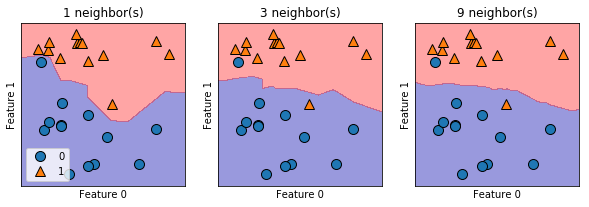

In [276]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    # the fit method returns the object self,
    # we can instantiate and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5,
                                   ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend(loc=3)
plt.show()

- Considering more and more neighbors leads to a smoother decision boundary. Corresponding to a simpler model.


- If you consider extreme cases where the number of neighbors is the number of all data points in the training set, each test point would have exactly the same neighbors(all training points) and all predictions would be the same: the class that is most frequent in the training set.

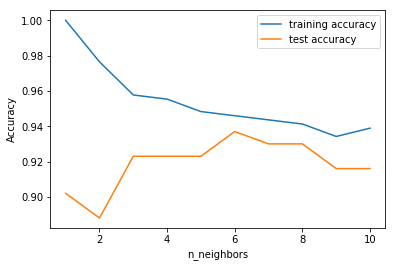

In [118]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=66)

training_accuracy = [] 
test_accuracy = []
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
# build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)
# record training set accuracy 
    training_accuracy.append(clf.score(X_train, y_train)) # record generalization accuracy test_accuracy.append(clf.score(X_test, y_test))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

- Using the single nearest neighbor leads to a model that is too complex. On the other hand when considering 10 neighbors, the model is too simple and performance is even worse. 


- Around six neighbors lies the best performance. Worst performance is 88% which is still acceptable.


#### kNearestNeighbors Regression

Using the wave dataset.

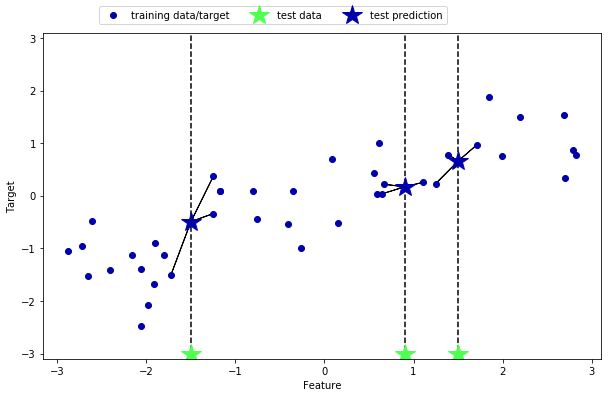

In [125]:
 mglearn.plots.plot_knn_regression(n_neighbors=3)

In [182]:
X, y = mglearn.datasets.make_wave(n_samples=40)
    # split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    # instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets 
reg.fit(X_train, y_train)

print("Test set predictions:\n{}".format(reg.predict(X_test)))

print('Test set R^2: {:.2f}'.format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


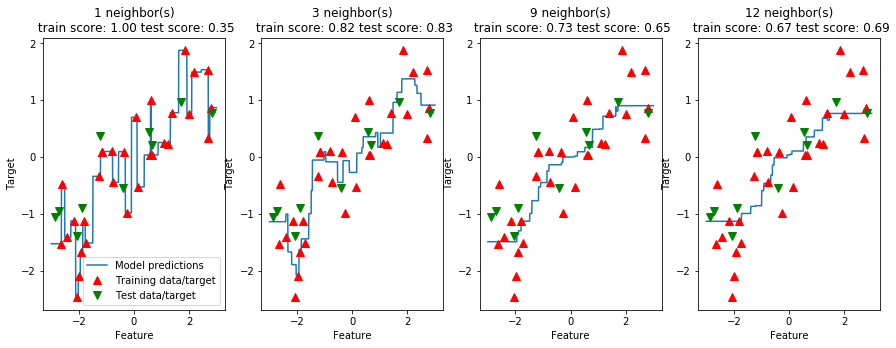

In [181]:
fig, axes = plt.subplots(1,4,figsize=(15,5))

# create 1000 data points, evenly spaced -3 to 3
line = np.linspace(-3, 3, 1000).reshape(-1,1)

# make predictions using 1,3,9 neighbors
for n_neighbors, ax in zip([1,3,9,12], axes):
    
    # create a model and fit it!
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    
    # PLOTING THE PREDICTION FOR THE WHOLE LINE!!!
    ax.plot(line, reg.predict(line))
    
    # Mark the points that lie on the train.
    ax.plot(X_train, y_train, '^', 
           c='red', markersize=8)
    
    # Mark the test points to see if they happens near it.
    ax.plot(X_test, y_test, 'v', c='green', 
           markersize=8)
    
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
                n_neighbors, reg.score(X_train, y_train),
                reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
    
axes[0].legend(['Model predictions', 'Training data/target',
               'Test data/target'], loc='lower right')
plt.show()


- Comparing predictions made by nearest neighbors regression for different values of n_neighbors

Using this algorithm is a good baseline method to try before considering more advanced techniques, when training set is very large the prediction can be very slow.

This approach often does not perform well on datasets with many features (hundreds or more) and **it does particularly badly with datasets where most features are 0 most of the time (sparse datasets)**

### Linear models for regression

$y = w_1x_2 + w_2x_2 + w_px_p + b$

- Where the number of features is $p$. 
- The $w$ are slopes.
- The $b$ is an intercept

Compared to the predictions made by KNeighborsRegressor using a straight line seems very restrictive. 

- But looking one-dimensional data gives a skewed perspective.

For datasets with many features, **linear models** can be very powerful. 

- In particular if you have more features than training points, any target $y$ (on the training set) can be modelleed as a linear function.

#### Linear regression (ordinary least squares)

The simplest and most classic method for regression. Finds the parameteres $w$ and $b$ that minimize then *mean squared error* between predictions and the true regression targets, $y$ on the training set.

$ RMSE = \dfrac{\sum_i^N (x_i - mean)^2}{N}$

In [190]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [ 0.39390555]
Intercept:  -0.0318043430268


_____
**NOTE** in scikit-learn always stores anything derived from the training data in attributes that end with trailing underscore. As we have only a single feature, the coefficient is only one.

In [196]:
print('Training set score: ', lr.score(X_train, y_train))
print('Test set score:     ', lr.score(X_test, y_test))

Training set score:  0.670089031508
Test set score:      0.659336859686


The $R^2$ around. $0.66$ is not very good **but we can see that the scores on the training and test sets are very close together. This means we are likely underfiting.**

- For this one-dimensional dataset, there is little danger of overfitting, as the model is very simple. 
- In higher dimensions, linear models become more powerful and there is high chance of overfitting. 


Let's check linear regression in the Boston Housing dataset (506 rows and 105 features).

In [242]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print('Training set score: ', lr.score(X_train, y_train))
print('Test set score:     ', lr.score(X_test, y_test))
print('Coefficeints:       ', np.median(lr.coef_))

Training set score:  0.952352643686
Test set score:      0.605775489294
Coefficeints:        -0.627096639898


### Ridge Regression

Though, the coefficients $w$ are chosen not only so that they predict well on the training data, but also to **fit an additional constraint**. 

- We want the coefficients as small as possible, all entries should be close to zero. Each feature should have as little effect on the outcomes as possible (small slope) while still predicting well. 

This is an example of **Regularization**. Restricting the model to avoid overfitting. For Ridge this is known as **L2**.



In [493]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('Training set score: ', ridge.score(X_train, y_train))
print('Test set score:     ', ridge.score(X_test, y_test))
print('Median of Coefficients:       ', np.median(ridge.coef_))

Training set score:  0.747326445708
Test set score:      0.732842730302
Median of Coefficients:        -0.0192579651733


- The training score of Ridge is lower than for **LinearRegression**. While the test set score is higher.

- How much importance the model places on simplicity against the training data can be specifed by the user using the alpha parameter.

In [494]:
ridge10 = Ridge(10).fit(X_train, y_train)
print("Training set score: ", ridge10.score(X_train, y_train)) 
print("Test set score:     ", ridge10.score(X_test, y_test))
print('Median Coefficients:', np.median(ridge10.coef_))

Training set score:  0.726275873843
Test set score:      0.720572459543
Median Coefficients: -0.00729078449692


In [251]:
ridge01 = Ridge(0.1).fit(X_train, y_train)
print("Training set score: ", ridge01.score(X_train, y_train)) 
print("Test set score:     ", ridge01.score(X_test, y_test))
print('Median Coefficients:', np.median(ridge01.coef_))

Training set score:  0.928578208201
Test set score:      0.771793368885
Median Coefficients: -0.627280942287


Here alpha=0.1 seems to be working well. 
- A higher alpha means higher restriction of coefficients, there we have the smallest coefficients.
- A lower alpha means lower restriction, more similar to the ordinary least squares.

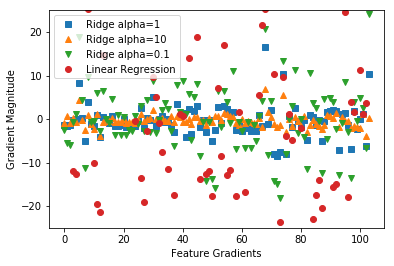

In [255]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='Linear Regression')
plt.xlabel('Feature Gradients')
plt.ylabel('Gradient Magnitude')
plt.ylim(-25,25)
plt.legend()

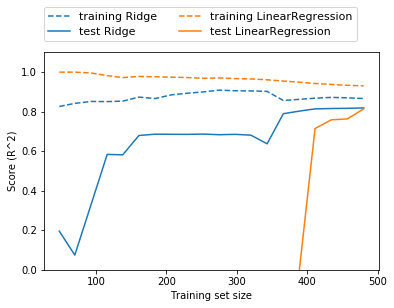

In [256]:
mglearn.plots.plot_ridge_n_samples()

- Becase Ridge is regularized, the training score is lower than the training score for linear regression across the board. 
- For less than 400 data points, linear regression is not able to learn anything.
- As more data becomes available both models improve and **linear regression catches up with ridge in the end**.


- *Notice the decrease in training performance for linear regression, if more data is added it becomes harder for the model to overfit, or memorize the data*.

**With enough data, regularization becomes less important**

#### Lasso

Lasso restricts coefficients to be close to zero, but in a way called **L1** regularization. When using this, some coefficients are *exactly zero*. 

- Some features are entirely ignored by the model.
- Form of automatic feature selection. Makes the model easier to interpret and can reveal the most important features of your model. 

In [261]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("Training set score: ", lasso.score(X_train, y_train)) 
print("Test set score:     ", lasso.score(X_test, y_test))
print('No. of features:    ', np.sum(lasso.coef_!=0))
print('Median Coefficients:', np.median(lasso.coef_))

Training set score:  0.293237689911
Test set score:      0.209375032553
No. of features:     4
Median Coefficients: 0.0


Lasso does quite badly. We are underfitting we find that we found only 4 of the 105 features. 
- Adjusting *alpha* controls how strongly coefficients are pushed toward zero.
- We increase max_iter parameter.

In [268]:
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)

print("Training set score: ", lasso.score(X_train, y_train)) 
print("Test set score:     ", lasso.score(X_test, y_test))
print('No. of features:    ', np.sum(lasso001.coef_!=0))
print('Median Coefficients:', np.median(lasso001.coef_))

Training set score:  0.896506955975
Test set score:      0.765648988784
No. of features:     33
Median Coefficients: 0.0


- If `alpha` is too low, we remove the effect of regularization and end up overfitting, a similar result of Linear Regression.

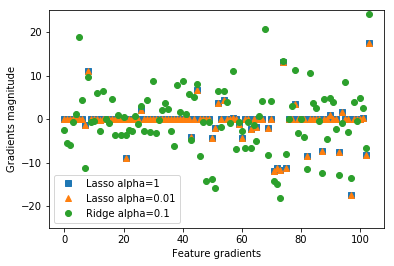

In [272]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')

plt.ylim(-25,25)
plt.xlabel('Feature gradients')
plt.ylabel('Gradients magnitude')
plt.legend()

- The Ridge model with alpha=0.1 has a similar predictive performance as the lasso model with alpha=0.01, but using Ridge, all coefficients are nonzero.

- Ridge is the first choice in practice. But if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice. 

- Lasso will provide also a model that is easier to understand.

- **Elastic Net** works best, but one needs to adjust **L1** and **L2** parameters.

#### Linear models for classification

Let's look at binary classification first.

$y = w_1x_2 + w_2x_2 + w_px_p + b > 0$

Instead of returning the weighted sum of the features, we treshold the predicted value at zero. 
- **If the function is smaller than zero, we predict the class $-1$. If its larger than zero, we predict $+1$.**

- For linear models in regression: a line, a plane, hyperplane.
- For linear models in classification: a decision boundary.

**There are many algorithms for linear models** they differ on which way they measure a combination of coefficients and intercept to fits the training data.

The most common is LogisticRegression and linear support vector machines (linear SVMs in `svm.LinearSVC` where SVC stands for support vector classifier).

#### Decision Boundaries

/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


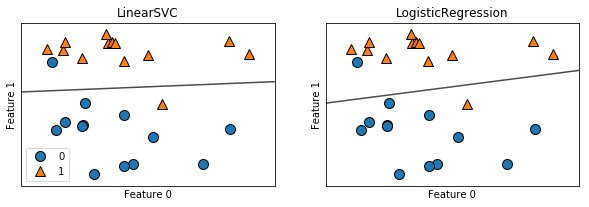

In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False,
                                   eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title(str(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    
axes[0].legend()

- By default, both models apply **L2** regularization in the same way that Ridge does for regression. 

In LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularizaiton is called *C*.
- higher values of C correspond to less regularization, try to fit the training as best as possible. 
- low values of C more regularization tries to get coefficients close to zero.


- Using low C will cause the algorithms to adjust to the majority of data points.
- Using high C stresses the importance that each individual point is identified correctly.

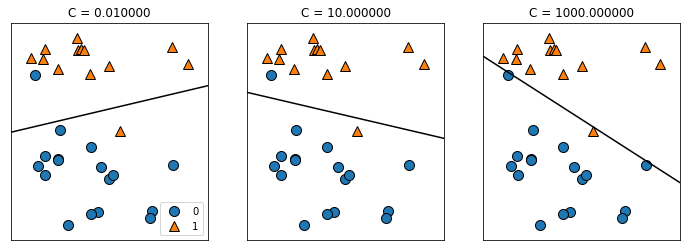

In [274]:
mglearn.plots.plot_linear_svc_regularization()

- On the right side a very high value of $C$, tilts the decision boundary a lot, now correctly classifying all points in class 0. 
- Overfitting.

#### Logistic Regression on more features

In [281]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=42) 
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


- With 95% accuracy on both training and set, we are likely underfitting. Increase C to find a more flexible model:

In [283]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Training set score {:.3f}'.format(logreg100.score(X_train, y_train)))
print('Test set score {:.3f}'.format(logreg100.score(X_test, y_test)))

Training set score 0.967
Test set score 0.965


In [398]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Training set score {:.3f}'.format(logreg001.score(X_train, y_train)))
print('Test set score {:.3f}'.format(logreg001.score(X_test, y_test)))

Training set score 0.934
Test set score 0.930


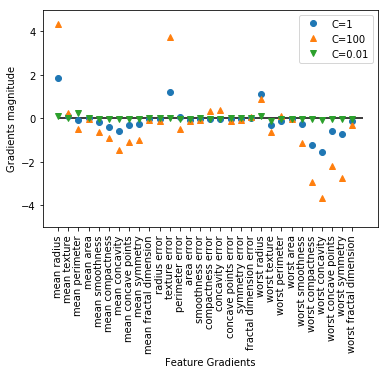

In [360]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label = 'C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names,
          rotation=90)
plt.hlines(0,0, cancer.data.shape[1])

plt.ylim(-5,5)
plt.xlabel('Feature Gradients')
plt.ylabel('Gradients magnitude')
plt.legend()

- As logistic regression applies **L2** regularization by default, the result looks similar to those produced by Ridge. Stronger reg pushes coefs around zero, but they never do. 

- Interpreting a model like this, one might think that the coefficient for mean perimeter means is indicativate of good ord bad. But actually, depending on which model we look at, a high mean perimenter could be taken as being either indicative of benign or malignant. **It changes sign**.

- Linear models should be taken with a grain of salt.

`plt.hlines(y, x, max_x)`

Where:

- $y$ is the coordinate where it starts in the $y$ axis.
- $x$ the coordinate where it starts in the $x$ axis. 
- $x_{max}$ is the coordinate where it ends in the $x$ axis.

`plt.vlines(x, y, max_y)`

Where:

- $y$ is the coordinate where it starts in the $y$ axis.
- $x$ the coordinate where it starts in the $x$ axis. 
- $y_{max}$ is the coordinate where it ends in the $y$ axis.

___
**NOTE** LogisticRegression uses by default **L2**. If we desire a more interpretable model **L1** might help.

- It limits the model to using only a few features.

Training accuracy of L1 LogReg with C=0.001 is 0.913
Test accuracy of L1 LogReg with C=0.001 is 0.923


Training accuracy of L1 LogReg with C=1 is 0.960
Test accuracy of L1 LogReg with C=1 is 0.958


Training accuracy of L1 LogReg with C=100 is 0.986
Test accuracy of L1 LogReg with C=100 is 0.979




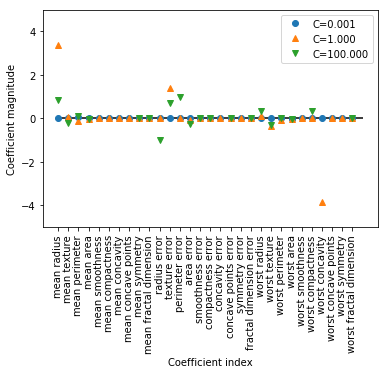

In [396]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1')
    lr_l1.fit(X_train, y_train)
    
    print('Training accuracy of L1 LogReg with C={} is {:.3f}'.format(
          C, lr_l1.score(X_train, y_train)))
    print('Test accuracy of L1 LogReg with C={} is {:.3f}'.format(
          C, lr_l1.score(X_test, y_test)))
    print('\n')
    plt.plot(lr_l1.coef_.T, marker, label = 'C={:.3f}'.format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

plt.ylim(-5,5)
plt.legend(loc='best')
    
    

### Linear Models for Multiclass Classification

A common technique extend binary classification to a multiclass classification algorithm: **one-vs.-rest** approach:
- A binary model is learned for each class that tries to separate that class from all other classes, as many binary models as there are classes.


- **To predict, all binary classifiers are run on a test point**. 
- The **classifier with the highest score on its single class 'wins'** and this class is returned. 


**Having one binary classifier per class results in having one vector of coefficients $w$ and one intercept $b$ for each class !**

The class or which the result of the classification confidence formula given here is the highest is the assinged class label:

$w_ox_o + w_1x_1 + ... + w_px_p + b$

- For **multiclass logistic regression**, mathematics differ somewhat from this approach, but they result in one coefficient vector and intercept per class, the same method of making a prediction applied.

In [491]:
X.shape

(100, 2)

In [492]:
y.shape

(100,)

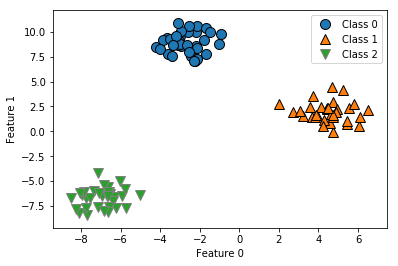

In [490]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2'])

Now we train a `LinearSVC` classifier on the dataset:

In [410]:
linear_svm=LinearSVC().fit(X,y)

print('Coefficient shape', linear_svm.coef_.shape)
print('Intercept shape  ', linear_svm.intercept_.shape)

Coefficient shape (3, 2)
Intercept shape   (3,)


The shape of *coef_* is $(3,2)$ meaning:
- each row of *coef_* contains the coefficient vector for one of the three classes
- each column holds the coefficient value for a specific feature.

While *intercept_* is an array storing the intercepts for each class.

In [411]:
linear_svm.coef_

array([[-0.17492676,  0.23140797],
       [ 0.47621697, -0.06937083],
       [-0.18914261, -0.20399791]])

In [412]:
linear_svm.intercept_

array([-1.07745545,  0.13140422, -0.08604839])

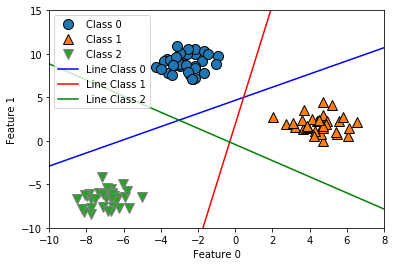

In [461]:
# Uncomment below for triangle in the middle. which class goes there?
#mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_,
                                 linear_svm.intercept_,
                                 ['b', 'r', 'g']):

    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10,8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line Class 0',
           'Line Class 1', 'Line Class 2'], loc = 'best')


- What happens at the point in the middle? 
- Chooses in the one with highest value for classification formula.
    - The class that is closest to the line.

(-10, 10)

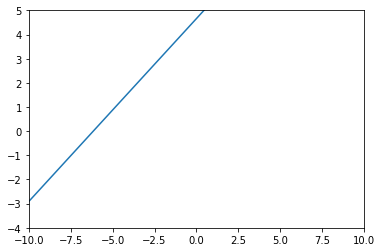

In [452]:
plt.plot(line, 
         -(linear_svm.coef_[0][0]*line + linear_svm.intercept_[0])/linear_svm.coef_[0][1])
plt.ylim(-4,5)
plt.xlim(-10,10)

 In a dataset of two features, we have three classes $A, B$ and $C$.
- For each one of them we train a binary classifier, that satisfies:

    $y = w_1x_1 + w_2x_2 + b > 0$
    
**If the weighted sum of the classifier is above one, we predict the target class, else we predict either one of the other classes**. 
- As we have three classes, and two features in our dataset we will have six different gradients, two for each one of the classes.


$w_{1A}, w_{2A}, 
w_{1B}, w_{2B}, 
w_{1C} ,w_{2C}$



In [455]:
linear_svm.coef_

array([[-0.17492676,  0.23140797],
       [ 0.47621697, -0.06937083],
       [-0.18914261, -0.20399791]])

- We have also three intercepts, one for each of the classes: $b_A, b_B, b_C$

In [456]:
linear_svm.intercept_

array([-1.07745545,  0.13140422, -0.08604839])

- No we can draw decision boundaries for each one of the clases.
- We have the two gradients and intercept for each model. But the algorithm does not spit the data points themselves, the gradient and intercept is all we need to describe a line (our model). 
- Because we want to draw a line, we create 'dimensional space' using `line=np.linspace(-15,15)` .


- In this example, $x_1$ represents the `line=np.linspace(-15,15)` and would be in the horizontal axis. This is okay, we don't have any plane yet. Nothing to plot.
- To find $x_2$ (the vertical axis) we need to apply the weights and intercepts learned by the model.

While plotting, `plt.plot`$(x_1, x_2)$, which means `plt.plot`$(x_1$, $-\dfrac{w_1x_1 + b}{w_2}$) 


Why the negative sign to plot the second feature? Let's see:

- $w_1x_1 + w_2x_2 + b = 0$
- $w_1x_1 + b = -w_2x_2$
- $\dfrac{w_1x_1 + b}{w_2} = -x_2$

- $x_2 = -\dfrac{w_1x_1 + b}{w_2}$
____

**In summary** the main parameter of linear models is the regularization parameter, called *alpha* in regression models and $C$ in LinearSVC and LogisticRegression.

- Large values for alpha or small values for $C$ mean simple models. 
- Usually $C$ and alpha are searched for on a logarithmic scale.
- $L1$ if you assume that only some features are important.
- $L2$ most of the time..

For data of hundreds of millions of samples, you might want to use `solver='sag'` option in LogisticRegression and Ridge, which can be faster than the default one.

Other option can be `SGDClassifier` and `SGDRegressor`, which implement even more scalable version of the linear models here.

- If your data set have highly correlated features, the coefficients might be hard to interpret.


Linear models are often used on very large datasets, simply because it's not feasible to train other models.

- In lower dimensional spaces, other models might be yield better generalization performance.

___ 
**NOTE** the fit method of all scikit-learn models returns self. This allows to write code like this:

`logreg=LogisticRegression().fit(X_train, y_train)`

This concatenation of method calls (here __init__ and then fit). This is known as **method chaining**.

`y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)`

This is ok but not ideal, the model isn't stored in any variable, we can't inspect it or use it to predict on any other data.



### Naive Bayes Classifiers

Similar to linear models, but tend to be even faster in training. While faster, the generalization is slighlty worse than linear classifiers like LogisticRegression and LinearSVC.

- Bayes models are efficient because they learn parameters by looking at each feature individually and collect simple per-class statistics from each feature.

- `GaussianNB, BernouliiMB and MultinomialNB` can be applied to any continuous data.


- `BernoulliNB` assumes binary data and `MultinomialNB` assumes count data (each feature represents an integer count of something, z.B how often a word appears in a sentence). Both are mostly used in **text data classification**.





#### `BernoulliNB` Bayesian

Counts how often every feature of each class is not zero. This can be understood with an example.

In [472]:
X = np.array([[0,1,0,1],
              [1,0,1,1],
              [0,0,0,1],
              [1,0,1,0]])

y = np.array([0,1,0,1]) # defines class for each row!


- For **class $0$, the first and third row**, the first feature is zero two times and nonzero zero times. 
- The second feature is zero one time and nonzero one time...

**Counting the nonzero entries per class** in essence looks like this:

In [473]:
counts ={}
for label in np.unique(y):
    #iterate over each class
    # count (sum) entries of 1 per feature
    
    counts[label] = X[y == label].sum(axis=0) #axis 0 is column
print('Feature counts:\n{}'.format(counts))
    

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


The other two naive Bayes models, are slightly different.

-`MultinomialNB`: takes into account average value of each feature for each class.

-`GaussianNB` : stores the average value as well as the standard deviation standard deviation of each feature for each class. 

- Both algorithms leads to a prediction formula that is of the same form as in the linear models. But *coef_* has different meaning.

- Both have a **single parameter alpha** which controls model complexity. 
- The way alpha works is that the algorithm adds to the data alpha many virtual data points that have positive values for all features. This results in a smoothing of statistics.

- *Large alpha* means more smoothing, less complex models. But alpha is not critical to a good performance! Model is robust ot this. But still improves accuracy somewhat.

`GaussianNB` is mostly used on very high dimensional data, while the other two variants of naive Bayes are used for sparse count data such as text. `MultinomialNB` generally better than `GaussianNB`.

- **SUMMARY**: These models are fast to train and predict, easy to understand. Works well on high dimensional sparse data and robust to parameters. Great baseline models, when even linear models might take too long.

### Decision Trees

Essentially they learn a hierarchy of if/else questions, leading to a decision. 

- Training means, learning the sequence of if/else questions that gets us to the true answer most quickly. Usually data does not come im the form of binary features, but are continuous.

Questions in continous data are of the form:
- Is feature $i$ larger than the value of $a$?

- Builds a hierarchical partition of the dataset.
- **As each test contains only a single feature, the regions resulting in partition always have axis-parallel boundaries**

##### Controlling Complexity
- Building a tree and continuing until all leaves are pure leads to models that are **very complex to the training data**. 
- **The presence of pure leaves means that a tree is 100$** accurate on the training set. The decision boundary focuses a lot on a single outlier.
- To prevent overfitting **preprunning** (stopping creation of tree early) and pruning nodes with little information. 
- Preprunning => `max_depth`, which limits the maximum number of leaves. **Scikit-Learn only implements preprunning**

In [474]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on training set: ', tree.score(X_train, y_train))
print('Accuracy on the test set: ', tree.score(X_test, y_test))

Accuracy on training set:  1.0
Accuracy on the test set:  0.937062937063


- If we don't restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. Unprunned trees are prone to overfitting and not generalize well. 

- Here we set `max_depth=4`: only $4$ consecutive questions can be asked. 
- `max_leaf_nodes` or `min_samples_leaf` reducing is sufficient to prevent overfitting.

In [475]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on training set: ', tree.score(X_train, y_train))
print('Accuracy on the test set: ', tree.score(X_test, y_test))

Accuracy on training set:  0.988262910798
Accuracy on the test set:  0.951048951049


### Visualizing Decision Trees

In [484]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', 
                class_names=['malignant', 'beningn'],
               feature_names=cancer.feature_names,
               impurity=False, filled=True)

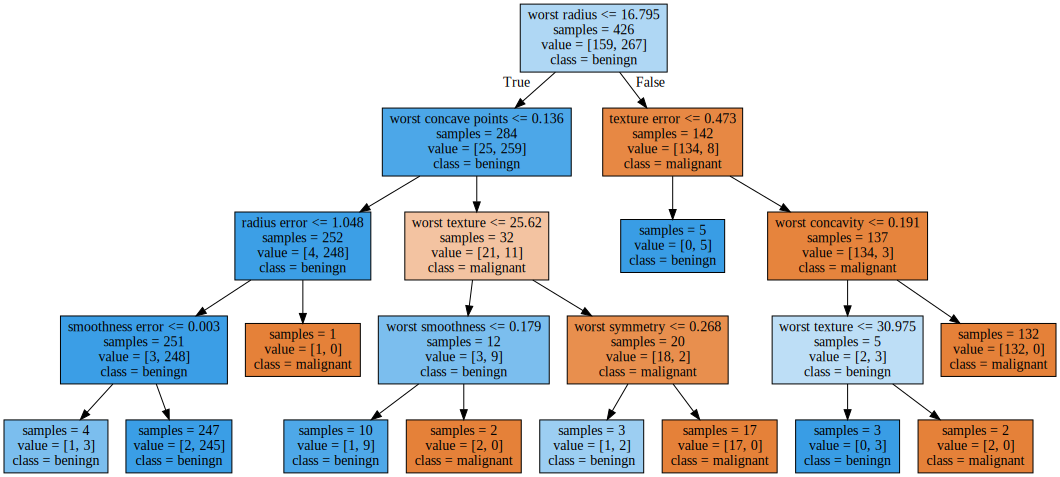

In [486]:
import graphviz 

with open('/Users/jdchipox/MachineLearning/tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- Instead of looking at the whole tree, there is a property that can summarize the workings of tree.

### Feature importance: how important each feature is for a decision a tree makes.

- It is a number between 0 and 1 for each feature, where 0 means 'not used at all' and 1 means 'perfectly predicts'. The feature importances always sum to 1.

In [487]:
print('Feature importance\n', tree.feature_importances_)

Feature importance
 [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


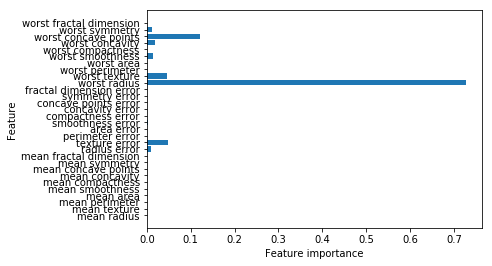

In [489]:
def plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    
plot_feature_importance_cancer(tree)

- **However, if a feature has low importance, is does not mean that this feauture is uninformative. Only means it was not picked by the tree**. Likely because another feature encodes the same information!!

- However, decision trees even with preprunning tend to overfit and provide poor generalization.

#### Ensembles of Decision Trees

***Ensembles* methods that combine multiple machine learning models to create poewrful models.**

- There are two models proven to be effective on a wide range of datasets for classification and regression. Both use decision trees: **random forests** and **gradient boosted decision trees**.

### Random Forests

- A collection of decision trees, where each tree is slighlty differnet from the others. each tree might do relatively good job on predicting, but will likely overfit on part of the data.

- If we build many trees, all of them overfitting. We can reduce the amount of overfitting by averaging the results. This can be shown using **rigoruous mathematics**.

- Random trees work injecting randomness into the tree building to ensure each tree is different. Two ways to be random: 


1. Selecting the data poitns used to build the tree
2. Selecting the features in each split test.

In [496]:
a = np.arange(9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [497]:
a[::,::]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

## Neural Networks

#### Classifying points with 2 features from two classes

In [10]:
X.shape

(100, 2)

In [14]:
X[0:5]

array([[ 1.87756309,  0.56839425],
       [ 0.36877983, -0.34894509],
       [ 0.96515318,  0.10921819],
       [ 0.48599685,  0.20291313],
       [ 1.72532644,  0.53367598]])

In [11]:
y.shape

(100,)

In [13]:
y[0:5]

array([1, 1, 0, 1, 1])

In [26]:
%matplotlib inline

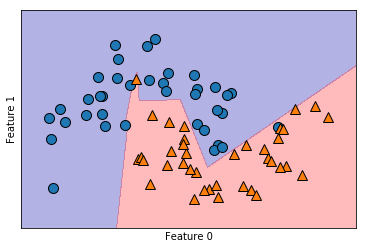

In [27]:
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

# Change the number of hidden layer_size =(nodes per layer1, nodes per layer2, nodes per layer3 etc.)
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(10,)).fit(X_train, y_train)
#mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(10,10,10,10)).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

**With only 10 hidden units and one layer, the decision boundary looks somewhat more ragged. With a single hidden layer, this means the decision function will be made up of 10 straight line segments.**

- If we want a smoother decision boundary we can add more hidden layers, units or add tanh

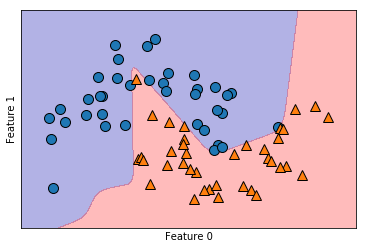

In [29]:
# Change the number of hidden layer_size =(nodes per layer1, nodes per layer2, nodes per layer3 etc.)
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(10,), activation='tanh').fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

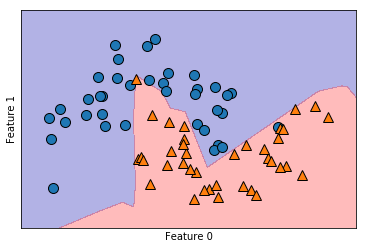

In [28]:
# Change the number of hidden layer_size =(nodes per layer1, nodes per layer2, nodes per layer3 etc.)
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(10,10)).fit(X_train, y_train)
#mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(10,10,10,10)).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

## Tweaking regularization parameter alpha

More alpha means less regularization, individual points are less important.

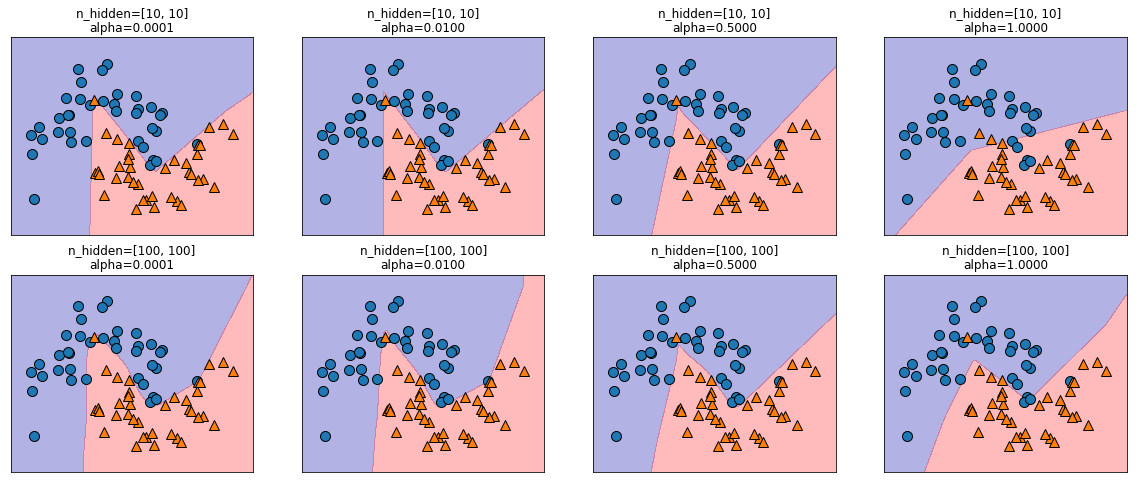

In [34]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8)) 
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.5, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=1,
                                hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                                alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax) 
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax) 
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

## Checking cancer data

Testing score is not so impressive. Needs proper scaling of the data

In [95]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42, hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


#### StandardScaler

In [114]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set 
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set 
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100,), solver='adam')
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


- Standard scaler did a massive change.
- To try to make our model to generalize better we can increase alpha:

In [98]:
mlp = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100,), alpha=1)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.986
Accuracy on test set: 0.979


## Visualize Coefficients

We had 30 features and 100 hidden nodes on a single layer. Weights connecting the input (30 features) and the hidden layer (100 nodes).

In [110]:
mlp.coefs_[0].shape

(30, 100)

Weights between hidden layer and the output layer.

In [111]:
mlp.coefs_[1].shape

(100, 1)

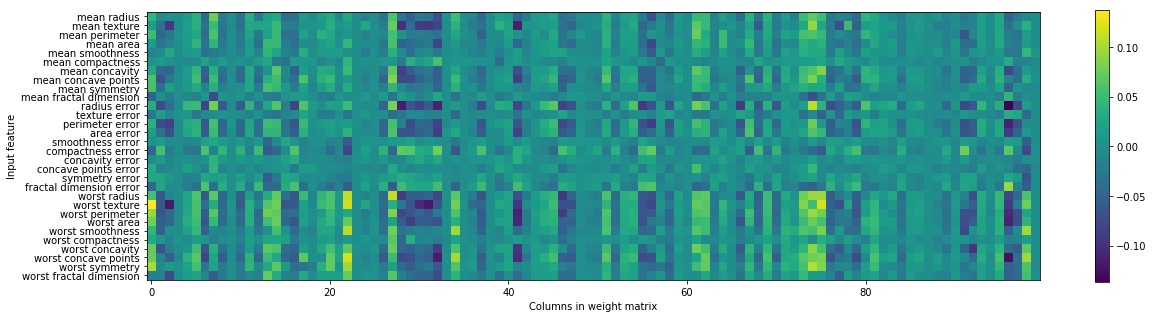

In [101]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()

In [9]:
import inspect

print(inspect.getsource(mglearn.plots.plot_2d_separator))

def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None, alpha=1,
                      cm=cm2, linewidth=None, threshold=None,
                      linestyle="solid"):
    # binary?
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0] if threshold is None else [threshold]
        fill_levels = [decision_values.min()] + levels + [
            decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5] if threshold is None else [threshold]
        fill_levels = [0] +

### Uncertainty of Classifiers

- Many classifers have either `decision_function` or `predict_proba` but many have both z.B `GradientBoostedClassifier`

In [117]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.datasets import make_blobs, make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
# we rename the classes "blue" and "red" for illustration purposes
y_named = np.array(["blue", "red"])[y]
# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
train_test_split(X, y_named, y, random_state=0)
# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

#### `decision_function`

In the binary classification, the return of `decision_function` is a shape of (n_samples, ). With a single floating point for each sample.

In [120]:
print("X_test.shape: {}".format(X_test.shape)) 
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


Means how strongly a model believes a data point belongs to a class. **Positive values mean in this case class 1. Negative values mean preference for class 2.**

For binary classification the **negative class** is the first entry in the .class_ attribute

In [128]:
gbrt.classes_

array(['blue', 'red'],
      dtype='<U4')

In [124]:
# show the first few entries of decision_function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)))

Decision function:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106
 -7.69097177  4.11001634  1.10753883  3.40782247 -6.46262729  4.28986668
  3.90156371 -1.20031192  3.66166106 -4.17231209 -1.23010022 -3.91576275
  4.03602808  4.11001634  4.11001634  0.65708962  2.69826291 -2.65673325
 -1.86776597]


In [125]:
# show the first few entries of decision_function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)>0))

Decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]


In [126]:
print(gbrt.predict(X_test))

['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [129]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int) # use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions: {}".format( np.all(pred == gbrt.predict(X_test))))

pred is equal to predictions: True


The arbitrary values/scale of the postivie negative make things hard to interpret.

Checking decision boundary and output of decision function (right).

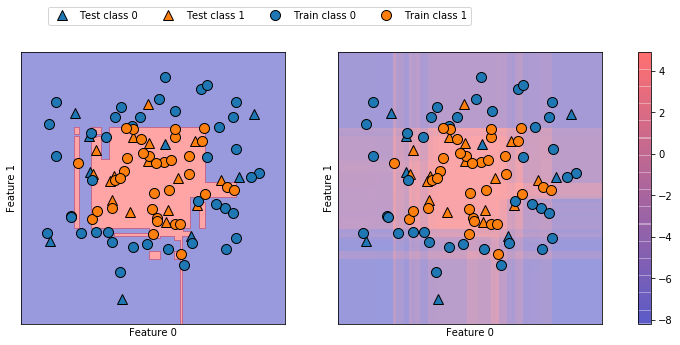

In [137]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                    fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                                alpha=.4, cm=mglearn.ReBl)
for ax in axes:
# plot training and test points 
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                                 markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                                 markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                    "Train class 1"], ncol=4, loc=(.1, 1.1))
plt.show()

### `predict_proba`

For binary classification it is of shape (n_samples, 2). Each row (col1 for class1) (col2 for class2) adds up to one.

In [138]:
print("Predicted probabilities:\n{}".format( gbrt.predict_proba(X_test)))

Predicted probabilities:
[[  1.57362600e-02   9.84263740e-01]
 [  8.45756491e-01   1.54243509e-01]
 [  9.81128693e-01   1.88713075e-02]
 [  9.74067751e-01   2.59322495e-02]
 [  1.35214179e-02   9.86478582e-01]
 [  2.50463685e-02   9.74953631e-01]
 [  9.99543275e-01   4.56725227e-04]
 [  1.61426459e-02   9.83857354e-01]
 [  2.48330011e-01   7.51669989e-01]
 [  3.20518856e-02   9.67948114e-01]
 [  9.98441742e-01   1.55825797e-03]
 [  1.35214179e-02   9.86478582e-01]
 [  1.98099196e-02   9.80190080e-01]
 [  7.68580268e-01   2.31419732e-01]
 [  2.50463685e-02   9.74953631e-01]
 [  9.84817488e-01   1.51825121e-02]
 [  7.73836115e-01   2.26163885e-01]
 [  9.80463918e-01   1.95360817e-02]
 [  1.73607853e-02   9.82639215e-01]
 [  1.61426459e-02   9.83857354e-01]
 [  1.61426459e-02   9.83857354e-01]
 [  3.41393690e-01   6.58606310e-01]
 [  6.30759354e-02   9.36924065e-01]
 [  9.34424780e-01   6.55752202e-02]
 [  8.66199569e-01   1.33800431e-01]]


**The class above 50% is the one that is predicted!** An overfited model means the model is more confident on its predictions, not actual reality. In a calibrated model a prediction of 70% is correct 70% of the time.



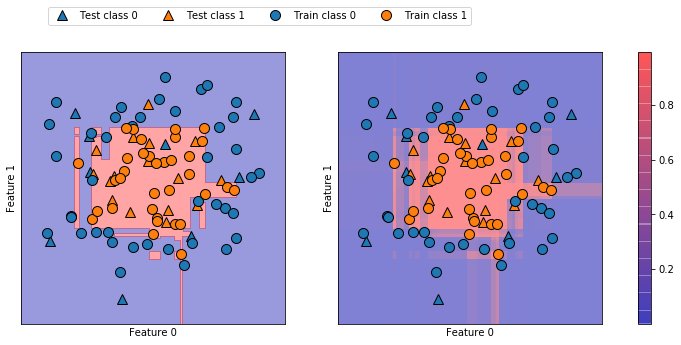

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
# plot training and test points 
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                                  markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                                  markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                     "Train class 1"], ncol=4, loc=(.1, 1.1))
plt.show()

### Classifier Intuition

A comparison of a several classifiers in scikit-learn on synthetic datasets. The point of this example is to illustrate the nature of decision boundaries of different classifiers. This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated linearly and the simplicity of classifiers such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers.

/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


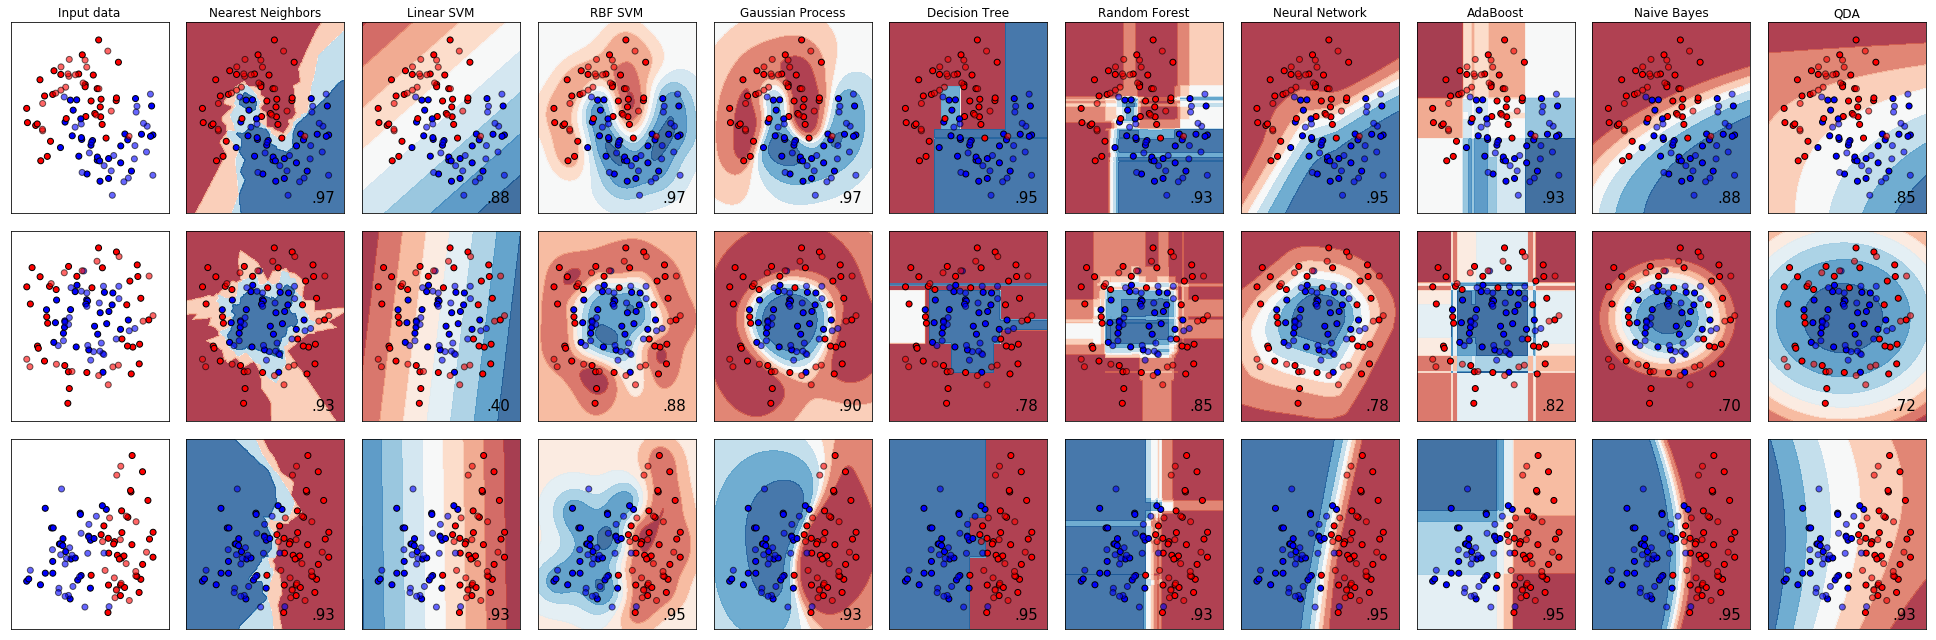

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVCbb
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Network", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, hidden_layer_sizes=(100,10)),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

### Multiclass-Classification


In [147]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### `decision_function`

In the multiclass case, **the decision_function has the shape (n_samples, n_classes) and each column provides a “certainty score” for each class, where a large score means that a class is more likely and a small score means the class is less likely**


You can recover the predictions from these scores by finding the maximum entry for each data point:

In [148]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape)) # plot the first few entries of the decision function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [149]:
print("Argmax of decision function:\n{}".format( np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


### `predict_proba`

The output of predict_proba has the same shape, (n_samples, n_classes). 
Again, **the probabilities for the possible classes for each data point sum to 1.**

In [150]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6])) # show that sums across rows are one
print("Sums: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[ 0.10664722  0.7840248   0.10932798]
 [ 0.78880668  0.10599243  0.10520089]
 [ 0.10231173  0.10822274  0.78946553]
 [ 0.10664722  0.7840248   0.10932798]
 [ 0.10825347  0.66344934  0.22829719]
 [ 0.78880668  0.10599243  0.10520089]]
Sums: [ 1.  1.  1.  1.  1.  1.]


To retrieve the predictions. Get argmax by rows.

In [151]:
print("Argmax of predicted probabilities:\n{}".format( np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


### Little Summary

- Nearest neighbors:
For small datasets, good as a baseline, easy to explain.
- Linear models:
Go-to as a first algorithm to try, good for very large datasets, good for very high- dimensional data.
- Naive Bayes:
Only for classification. Even faster than linear models, good for very large data‐ sets and high-dimensional data. Often less accurate than linear models.
- Decision trees:
Very fast, don’t need scaling of the data, can be visualized and easily explained.
- Random forests:
Nearly always perform better than a single decision tree, very robust and powerful. Don’t need scaling of data. Not good for very high-dimensional sparse data.
- Gradient boosted decision trees:
Often slightly more accurate than random forests. Slower to train but faster to predict than random forests, and smaller in memory. Need more parameter tuning than random forests.
- Support vector machines:
Powerful for medium-sized datasets of features with similar meaning. Require scaling of data, sensitive to parameters.
- Neural networks:
Can build very complex models, particularly for large datasets. Sensitive to scaling of the data and to the choice of parameters. Large models need a long time to train.

